In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
import random
import torch
from d2l import torch as d2l
from matplotlib import pyplot as plt

In [2]:
def scatter_plot(x, y, plot_size=1):
    '''
    plot scattered data
    '''
    plt.scatter(x, y, plot_size)
    plt.show()

In [3]:
def synthetic_data(w, b, num_examples):
    '''
    generate random data
    y = Xw + b + epsilon
    '''
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [4]:
def data_iter(batch_size, features, labels):
    '''
    return a data iterator with mini-batch feature
    '''
    num = len(features)
    indices = list(range(num))
    # randomize
    random.shuffle(indices)
    for i in range(0, num, batch_size):
        # use min to prevent crossing border
        batch_indices = torch.tensor(indices[i : min(i + batch_size, num)])
        yield features[batch_indices], labels[batch_indices]

In [5]:
def linreg(X, w, b):
    '''
    linear regression model
    '''
    return torch.matmul(X, w) + b

def square_loss(y_hat, y):
    '''
    square loss function
    '''
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, learning_rate, batch_size):
    '''
    stochastic gradient descent
    '''
    with torch.no_grad():
        for param in params:
            param -= learning_rate * param.grad / batch_size
            param.grad.zero_()

True x_1 - y plot


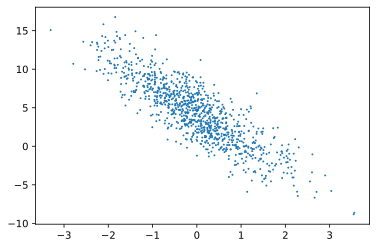

In [6]:
# generate data
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

# test plot
print("True x_1 - y plot")
scatter_plot(features[:, 1].detach().numpy(),
             labels.detach().numpy())

In [7]:
# define model parameter
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

learning_rate = 0.03
num_epochs = 10
net = linreg
loss = square_loss
batch_size = 10

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], learning_rate, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.025626
epoch 2, loss 0.000091
epoch 3, loss 0.000047
epoch 4, loss 0.000047
epoch 5, loss 0.000047
epoch 6, loss 0.000047
epoch 7, loss 0.000047
epoch 8, loss 0.000048
epoch 9, loss 0.000048
epoch 10, loss 0.000047
